In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,f1_score,recall_score,make_scorer,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_curve,auc,accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

In [2]:
df =pd.read_csv("./Data_clean/min_max_both_inter_scaled.csv")

In [3]:
X = df.drop(["FLAG", "CONS_NO"],axis=1)

In [4]:
y = df.FLAG

In [5]:
X = np.array(X)

In [6]:
y = np.array(y)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32204, 1034)
(32204,)
(8052, 1034)
(8052,)


In [9]:
model = SVC()

In [10]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Don't touch this from here

In [12]:
model.fit(x_train,y_train)

SVC()

In [13]:
y_pred = model.predict(x_test)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7346
           1       0.75      0.00      0.01       706

    accuracy                           0.91      8052
   macro avg       0.83      0.50      0.48      8052
weighted avg       0.90      0.91      0.87      8052



In [15]:
accuracy_score(y_test,y_pred)

0.912568306010929

In [17]:
#normalized false gives the no of corryectly classifies out of sample
#normalized True gives percentage accuracy
count = accuracy_score(y_test,y_pred,normalize=False)

In [18]:
print(f"No of correctly classified samples {count} out of {len(y_test)}")

No of correctly classified samples 7348 out of 8052


In [20]:
cm = confusion_matrix(y_test,y_pred,labels=model.classes_)

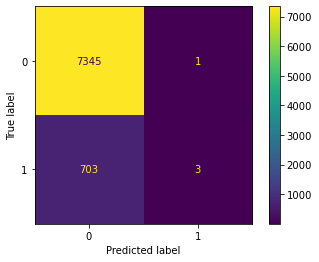

In [22]:
ConfusionMatrixDisplay(cm,display_labels=model.classes_).plot();

In [3]:
flag_1_calc = df.loc[df["FLAG"]==1]

In [4]:
flag_1_calc

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264158,0.296902,0.297637,0.350616,0.201613,0.321919,0.342154,0.277402,0.337003,0.247970
1,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,B32AC8CC6D5D805AC053557AB05F5343,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,EDFC78B07BA2908B3395C4EB2304665E,1,0.048145,0.112494,0.144199,0.058008,0.064819,0.105683,0.091123,0.066463,...,0.313762,0.220056,0.178957,0.123532,0.123297,0.138093,0.156646,0.235791,0.211602,0.184829
4,6BCFD78138BC72A9BA1BFB0B79382192,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,3ECE4EDBB9D1872BEF3059C20EC22E1F,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3575,5147B8E84450B2B47551922B768FBBFD,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001139,0.000000,0.000000
3576,1B128CCB5A2708EA3359D9844AFD5B60,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.558733,0.752962,0.836167,0.838743,0.956466,0.839773,0.714580,0.896445,0.893612,1.000000
3577,375F96C23231CC72E2E6AE260F4EC772,1,0.060892,0.179809,0.209911,0.198862,0.168316,0.119473,0.138725,0.190080,...,0.879527,0.793535,0.741202,0.567017,0.555635,0.622352,0.856473,0.745626,0.649919,0.740379


In [5]:
flag_0_calc = df.loc[df["FLAG"]==0]

In [6]:
num = len(flag_1_calc)

In [7]:
flag_0_calc_reduced= flag_0_calc.sample(num)

In [8]:
frames = [flag_1_calc,flag_0_calc_reduced]

In [9]:
res_df=pd.concat(frames)

In [10]:
res_df

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264158,0.296902,0.297637,0.350616,0.201613,0.321919,0.342154,0.277402,0.337003,0.247970
1,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,B32AC8CC6D5D805AC053557AB05F5343,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,EDFC78B07BA2908B3395C4EB2304665E,1,0.048145,0.112494,0.144199,0.058008,0.064819,0.105683,0.091123,0.066463,...,0.313762,0.220056,0.178957,0.123532,0.123297,0.138093,0.156646,0.235791,0.211602,0.184829
4,6BCFD78138BC72A9BA1BFB0B79382192,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37388,63D27DB09D3E5E2520F642DB717EE65A,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.409185,0.422085,0.311662,0.263158,0.304954,0.322497,0.332817,0.371001,0.508772,0.289474
18288,B3F76434591916FCCA087EDDF67F748F,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
38473,CC4FAC49232E6237DFBB1A7D980A5946,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.457831,0.000000,0.000000,...,0.251721,0.271084,0.398021,0.340361,0.328313,0.430723,0.329604,0.394148,0.404905,0.344664
37335,B01B72011D7CDE34F82075C93A87F756,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.265667,0.234065,0.198179,0.204071,0.209963,0.238350,0.238350,0.234065,0.169255,0.171398


In [11]:
res_df = df.sample(frac=1).reset_index(drop=True)

In [12]:
res_df

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,C2C80129ABBB6884A57E827F736E202C,1,0.141849,0.118005,0.109246,0.068127,0.078102,0.108273,0.083455,0.080049,...,0.314355,0.322384,0.286375,0.264477,0.322871,0.303406,0.327251,0.275912,0.256204,0.298297
1,419C626DB220918817B66EA550A2FBBA,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.112071,0.105972,0.089199,0.091487,0.092757,0.101398,0.103685,0.096823,0.085388,0.086404
2,729D5960B220417561AF5CD76303CAA0,1,0.264812,0.204910,0.223895,0.000000,0.220622,0.184288,0.000000,0.187561,...,0.504746,0.535188,0.494272,0.560065,0.551555,0.557774,0.587234,0.446154,0.545990,0.476923
3,A9C521AFCE6117947D62BBCB7DB578D3,0,0.000000,0.000000,0.000000,0.000000,0.268657,0.305970,0.358209,0.320896,...,0.253731,0.298507,0.186567,0.208955,0.171642,0.238806,0.186567,0.199005,0.211443,0.223881
4,4D1A0ADC24A9ED44F92FD33FAA75B90A,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.216687,0.300834,0.260072,0.271275,0.288439,0.266746,0.298927,0.274613,0.239094,0.240048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,5BC70BF0D8D59165659A7DE8072404E9,0,0.319412,0.323733,0.228111,0.283410,0.302707,0.309332,0.282834,0.343318,...,0.242224,0.198157,0.212558,0.219470,0.267281,0.263825,0.307028,0.273618,0.203629,0.208813
40252,E56467F5A2C7FA82A7B3228B05EC0D9E,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.276786,0.260045,0.131696,0.130580,0.239955,0.247768,0.272321,0.301339,0.214286,0.271205
40253,A9DD5E54799091BCC198051C034B281C,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40254,AF6160A2F4D1C781F2E53CE3BF20D1FF,1,0.085592,0.069099,0.071855,0.057383,0.068869,0.057980,0.067399,0.056510,...,0.576679,0.594551,0.303914,0.270651,0.307820,0.325737,0.388404,0.545162,0.471837,0.246210


In [13]:
X_1 = np.array(res_df.drop(["CONS_NO","FLAG"],axis=1))

In [14]:
y_1 = np.array(res_df.FLAG)

In [15]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X_1,y_1,test_size=0.2)

In [16]:
model_red = SVC()

In [17]:
model_red.fit(x_train1,y_train1)

SVC()

In [18]:
y_pred_1=model_red.predict(x_test1)

In [19]:
print(classification_report(y_test1,y_pred_1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7337
           1       0.67      0.00      0.01       715

    accuracy                           0.91      8052
   macro avg       0.79      0.50      0.48      8052
weighted avg       0.89      0.91      0.87      8052



In [20]:
#normalized True gives percentage accuracy
count1 = accuracy_score(y_test1,y_pred_1,normalize=False)

In [24]:
cm = confusion_matrix(y_test1,y_pred_1,labels=model_red.classes_)

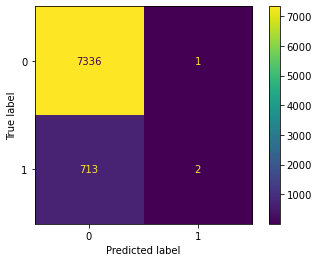

In [25]:
ConfusionMatrixDisplay(cm,display_labels=model_red.classes_).plot();

In [27]:
roc_auc_score(y_test1,y_pred_1)

0.5013304536542916

In [7]:
grid_svm_gamma_low_version = GridSearchCV(
    estimator=SVC(verbose=True),
    param_grid={
        'gamma': [1,10],
               },
    scoring={"precision": make_scorer(precision_score),
            "recall":make_scorer(recall_score),
                "f1_score":make_scorer(f1_score),
           "roc_auc_score":make_scorer(roc_auc_score)
            },
    refit="roc_auc_score",
    return_train_score=True,
    verbose=1,
    cv=4,
    n_jobs=-1
    
    
)

In [8]:
grid_svm_gamma_low_version.fit(X,y)

Fitting 4 folds for each of 2 candidates, totalling 8 fits
[LibSVM]

GridSearchCV(cv=4, estimator=SVC(verbose=True), n_jobs=-1,
             param_grid={'gamma': [1, 10]}, refit='roc_auc_score',
             return_train_score=True,
             scoring={'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score),
                      'roc_auc_score': make_scorer(roc_auc_score)},
             verbose=1)

In [13]:
results = pd.DataFrame(grid_svm_gamma_low_version.cv_results_)

In [14]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split3_test_roc_auc_score,mean_test_roc_auc_score,std_test_roc_auc_score,rank_test_roc_auc_score,split0_train_roc_auc_score,split1_train_roc_auc_score,split2_train_roc_auc_score,split3_train_roc_auc_score,mean_train_roc_auc_score,std_train_roc_auc_score
0,10427.713081,3513.941330,3962.172650,3138.201986,1,{'gamma': 1},0.0,0.0,0.0,0.0,...,0.5,0.5,0.0,1,0.990686,0.991990,0.991244,0.991806,0.991431,0.000511
1,15781.588205,95.853765,677.149324,22.552833,10,{'gamma': 10},0.0,0.0,0.0,0.0,...,0.5,0.5,0.0,1,0.998882,0.999441,0.998882,0.999441,0.999162,0.000279


In [11]:
grid_svm_gamma = GridSearchCV(
    estimator=SVC(verbose=True),
    param_grid={
        'C': [0.1,1.0,10,100],
        "class_weight":[{0:1,1:v} for v in range(1,5)],
        'gamma': [0.1,1,10,100],
               },
    scoring={"precision": make_scorer(precision_score),
            "recall":make_scorer(recall_score),
            "f1_score":make_scorer(f1_score),
           "roc_auc_score":make_scorer(roc_auc_score)
            },
    refit="roc_auc_score",
    return_train_score=True,
    verbose=1,
    cv=4,
    n_jobs=-1
    
    
)

In [12]:
grid_svm_gamma.fit(X,y)

TypeError: fit() missing 1 required positional argument: 'X'

## continue from here

In [15]:
#oversampling of minority class (imbalanced learning)
over = SMOTE(sampling_strategy=0.2,random_state=0)
over_x_train,over_y_train = over.fit_resample(X,y)

In [25]:
model = SVC(probability = True)

In [17]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [18]:
x_train,x_test,y_train,y_test = train_test_split(over_x_train,over_y_train,test_size=0.20)

In [19]:
model.fit(x_train,y_train)

SVC(probability=True)

In [20]:
y_pred =model.predict(x_test)

In [26]:
accuracy_score(y_test,y_pred)

0.84687038509599

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.91      7277
           1       0.86      0.14      0.24      1526

    accuracy                           0.85      8803
   macro avg       0.85      0.57      0.58      8803
weighted avg       0.85      0.85      0.80      8803



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix SVM @80
[[7241   36]
 [1312  214]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.99505291 0.00494709]
 [0.85976409 0.14023591]]


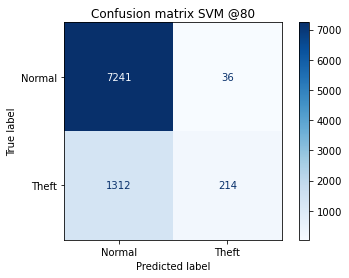

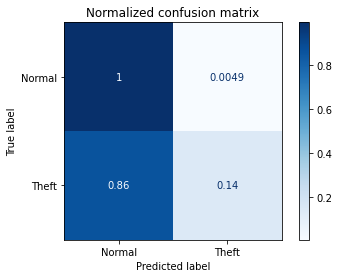

In [22]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix SVM @80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [23]:
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

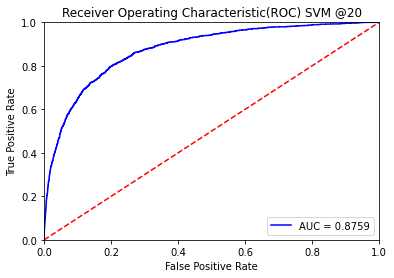

In [24]:
plt.title("Receiver Operating Characteristic(ROC) SVM @20")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()